In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lsst.utils.plotting import publication_plots
publication_plots.set_rubin_plotstyle()
bands_dict = publication_plots.get_band_dicts()

import seaborn as sns

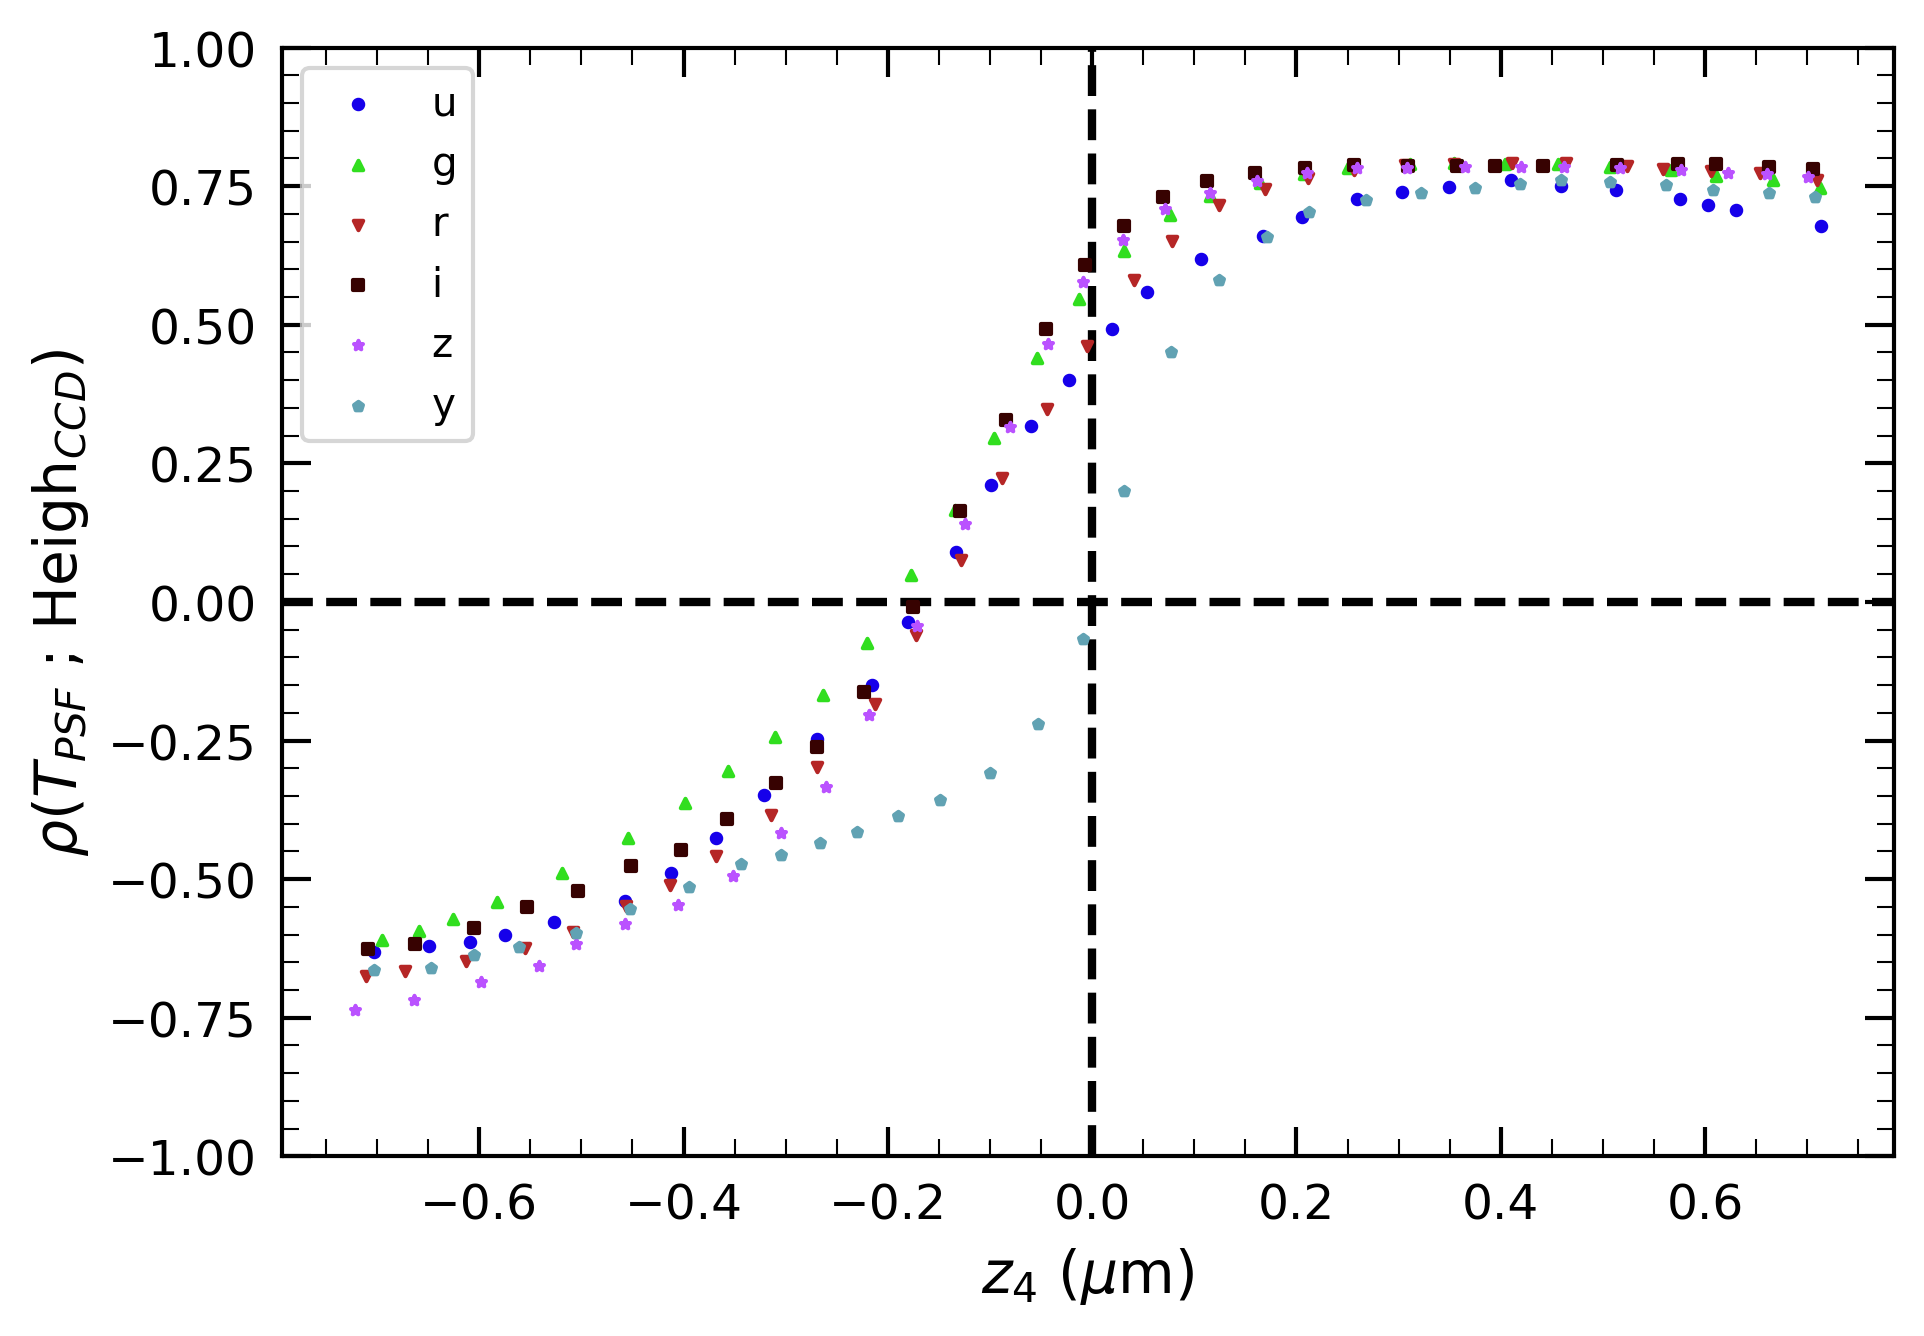

In [2]:
dic = {}

for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    dic.update({band: pd.read_pickle(f'data/rho_sweep_{band}_z4.pkl')})

plt.subplots_adjust(right=0.99, left=0.15)
for band in ['u', 'g', 'r', 'i', 'z', 'y']:

    plt.scatter(dic[band]['Z_i_SWEEP'], dic[band]['RHOSWEEP'], zorder=1, s=5, 
                c=bands_dict['colors'][band], marker=bands_dict['symbols'][band],
                label=band)

plt.legend()

xlim = plt.xlim()
ylim = plt.ylim(-1,1)

plt.plot([0,0], ylim, 'k--', zorder=0)
plt.plot(xlim, [0,0], 'k--', zorder=0)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(f'$z_4$ ($\\mu$m)', fontsize=14)
_ = plt.ylabel('$\\rho$($T_{PSF}$ ; Heigh$_{CCD}$)', fontsize=14)
plt.savefig('rho_vs_z4_per_filter.png')

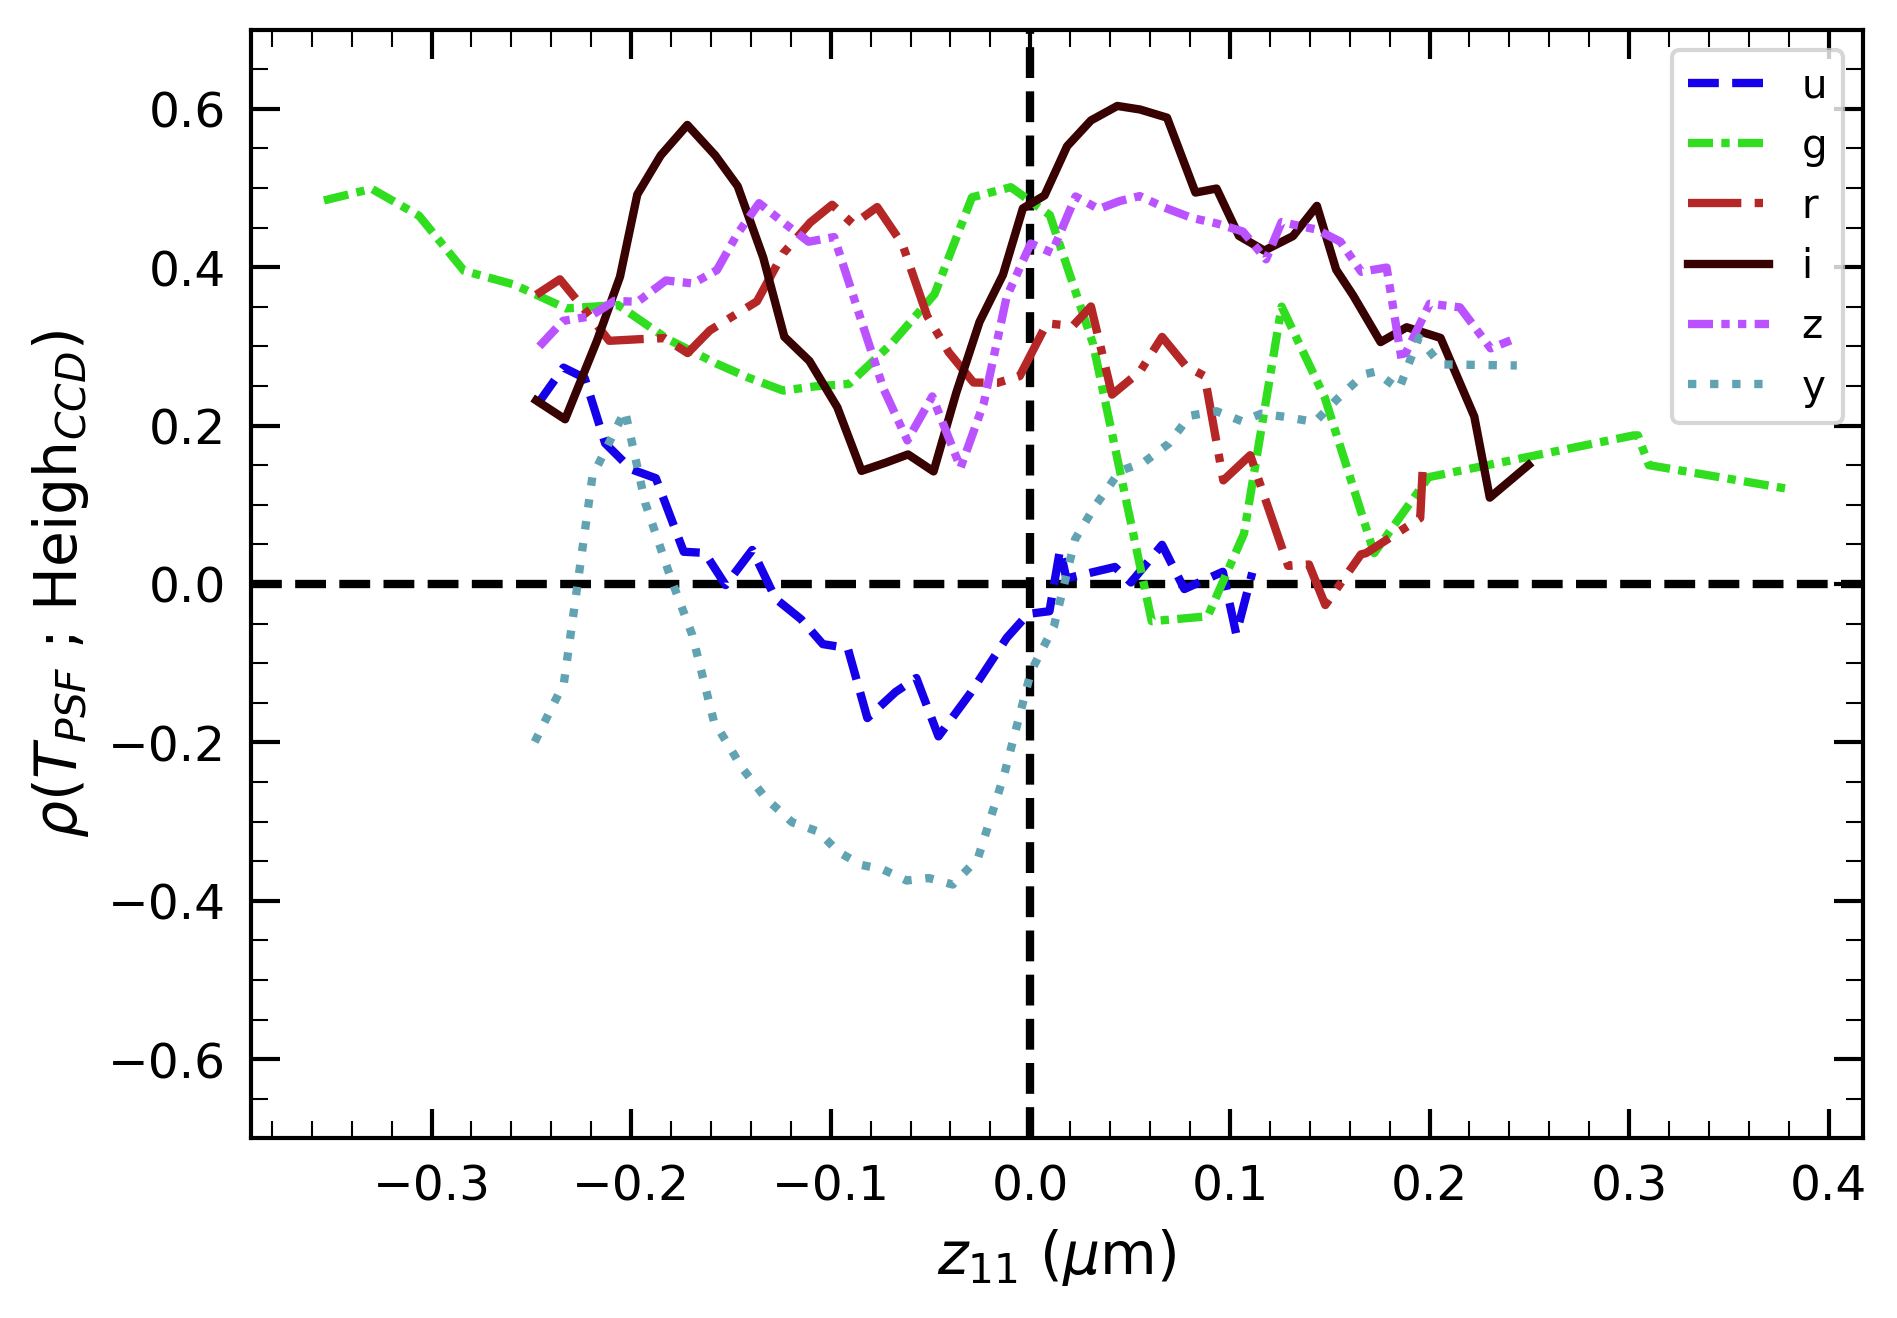

In [39]:
dic = {}

BANDS = ['u', 'g', 'r', 'i', 'z', 'y']

for band in BANDS:
    dic.update({band: pd.read_pickle(f'data/rho_sweep_{band}_z11.pkl')})

plt.subplots_adjust(right=0.99, left=0.15)
for band in BANDS:

    plt.plot(dic[band]['Z_i_SWEEP'], dic[band]['RHOSWEEP'], linestyle=bands_dict['line_styles'][band],
             zorder=1, c=bands_dict['colors'][band],# s=5, marker=bands_dict['symbols'][band],
             label=band)

plt.legend()

xlim = plt.xlim()
ylim = plt.ylim(-0.7,0.7)

plt.plot([0,0], ylim, 'k--', zorder=0)
plt.plot(xlim, [0,0], 'k--', zorder=0)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$z_{11}$ ($\\mu$m)', fontsize=14)
_ = plt.ylabel('$\\rho$($T_{PSF}$ ; Heigh$_{CCD}$)', fontsize=14)
plt.savefig('rho_vs_z11_per_filter.png')

In [32]:
print(np.mean(dic['g']['DTSWEEP'][20]))
print(np.mean(dic['g']['HEIGHTSWEEP'][20]))

-0.0036439913353238976
-3.7150952e-05


In [34]:
np.corrcoef(dic['g']['DTSWEEP'][20], dic['g']['HEIGHTSWEEP'][20])

array([[ 1.        , -0.04086344],
       [-0.04086344,  1.        ]])

In [36]:
np.corrcoef(dic['g']['DTSWEEP'][20]-np.mean(dic['g']['DTSWEEP'][20]), dic['g']['HEIGHTSWEEP'][20]-np.mean(dic['g']['HEIGHTSWEEP'][20]))

array([[ 1.        , -0.04086344],
       [-0.04086344,  1.        ]])

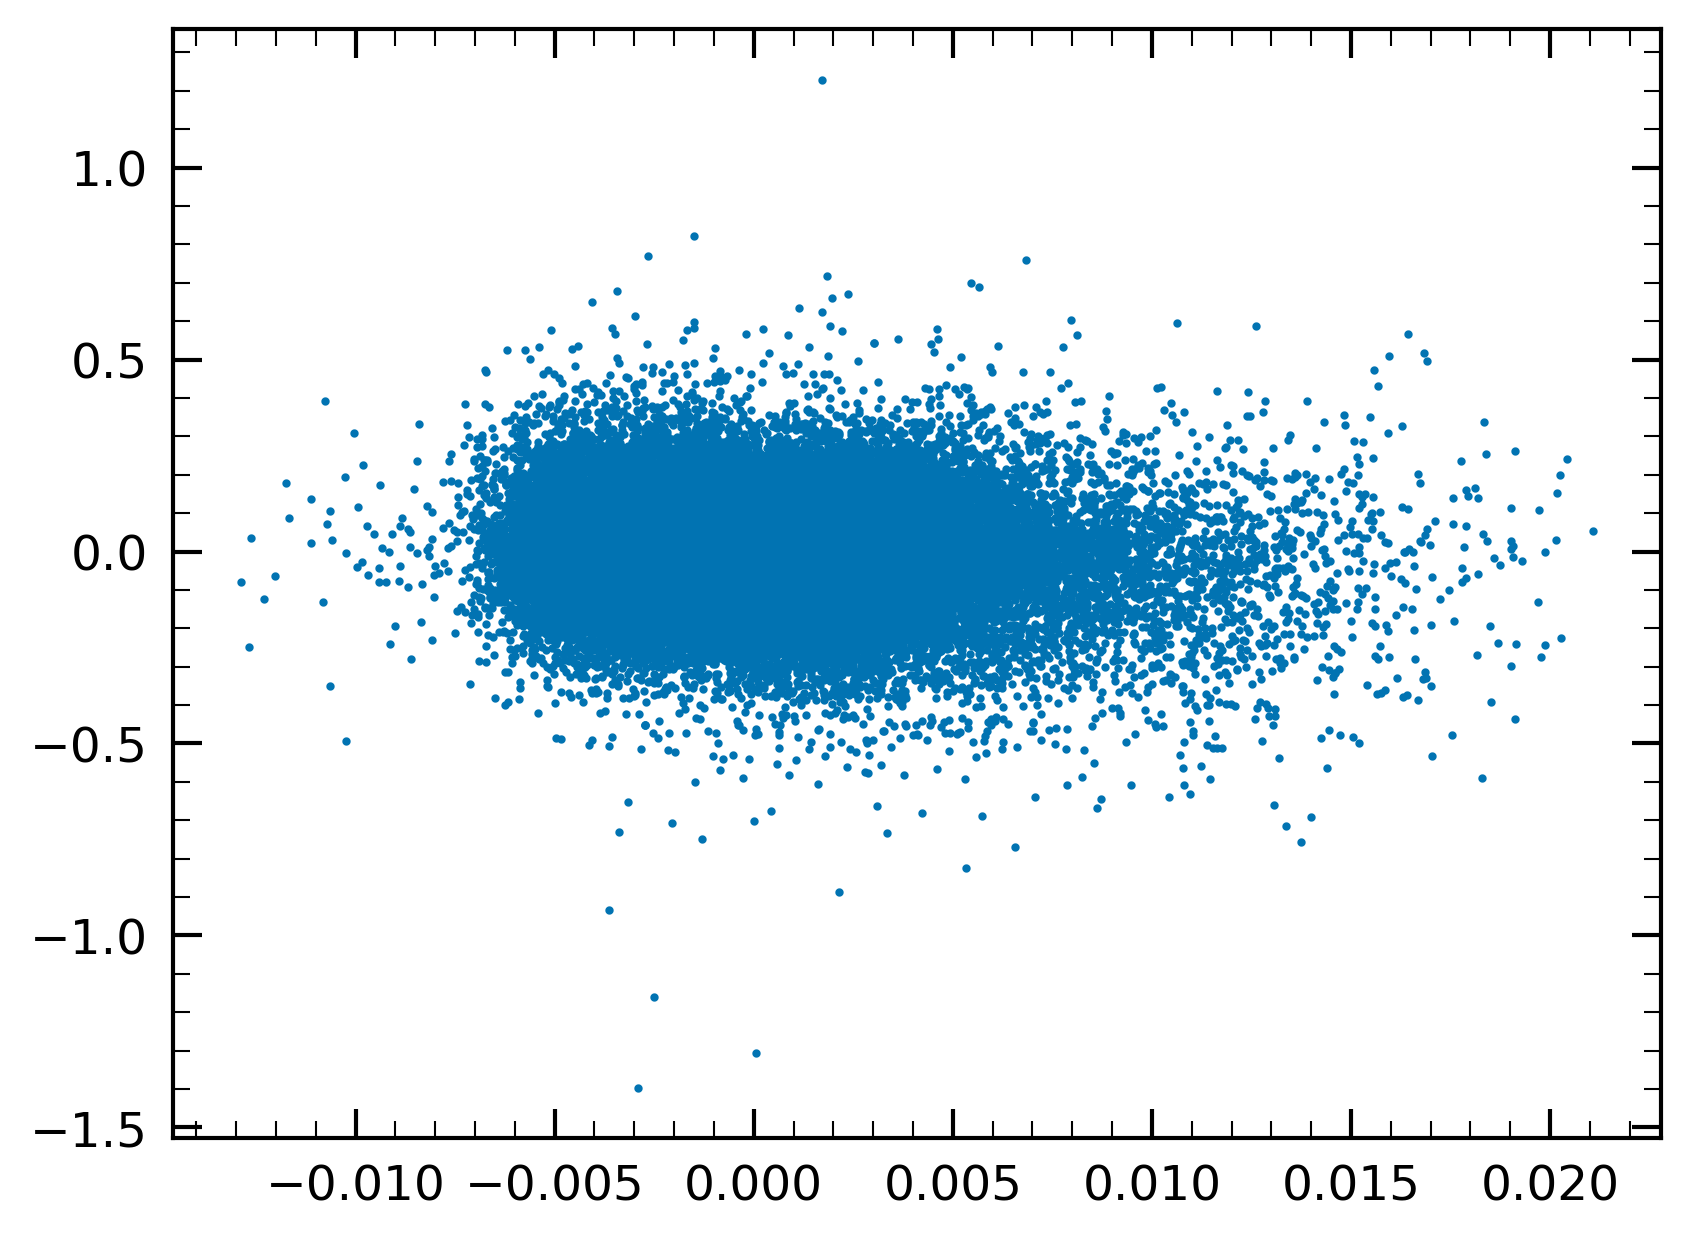

In [38]:
plt.scatter(dic['g']['HEIGHTSWEEP'][20], dic['g']['DTSWEEP'][20], s=1)
